In [ ]:
Dimension Reduction

In [92]:
from imblearn.over_sampling import RandomOverSampler
import os
import pandas as pd
titanic_col_names = ['Age', 'Cabin', 'Embarked', 'Fare', 'Name', 'Parch', 'PassengerId', 'Pclass', 'Sex', 'SibSp', 'Survived', 'Ticket', 'Title','Family_Size']

def get_data():

    #TODO: Update here
    os.chdir(r"D:\\gatech\\cs7641\\supervised_learning")
    titanic = pd.read_csv("titanic.csv", header = None)
    #Adding the column names
    titanic_col_names = ['Age', 'Cabin', 'Embarked', 'Fare', 'Name', 'Parch', 'PassengerId', 'Pclass', 'Sex', 'SibSp', 'Survived', 'Ticket', 'Title','Family_Size']
    titanic.columns = titanic_col_names

    X = titanic.drop(['Survived'], axis=1)
    X = titanic.drop(['Name'], axis=1)
    # X2.dropna()

    y = titanic['Survived']

    X = pd.get_dummies(X[['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare', 'Embarked', 'PassengerId']])  

    return X, y;

PCA

Explained variance ratio: [0.22619422 0.18173606]


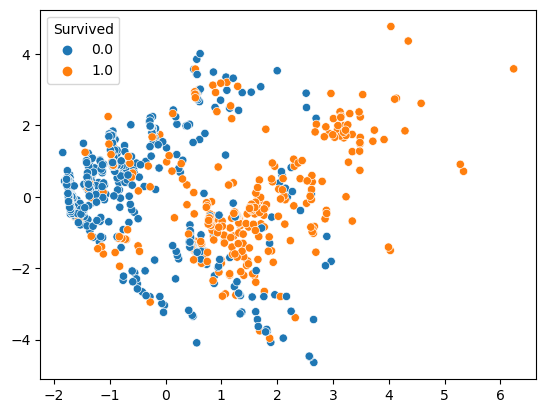

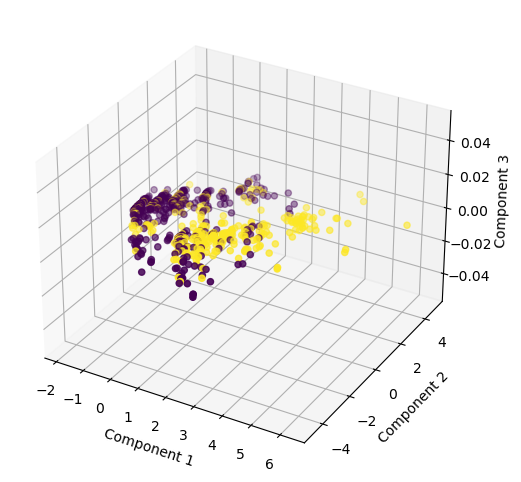

No handles with labels found to put in legend.


IndexError: index 2 is out of bounds for axis 1 with size 2

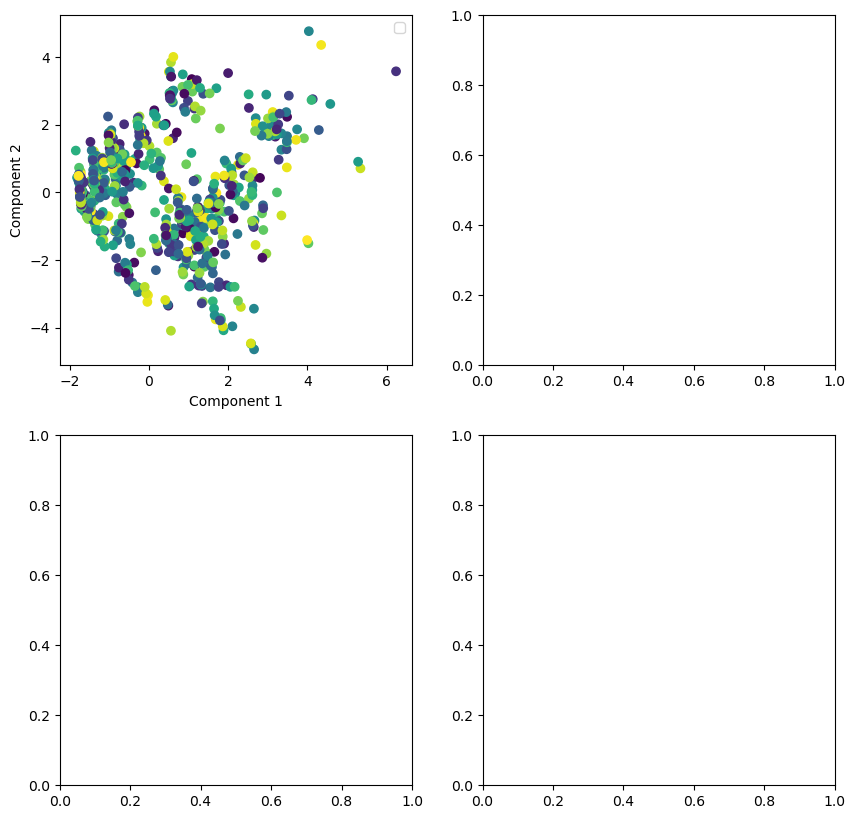

In [93]:
from sklearn.decomposition import PCA
from sklearn.datasets import load_wine
import pandas as pd
import seaborn as sns
from sklearn.preprocessing import StandardScaler
import numpy as np
import matplotlib.pyplot as plt


X, y = get_data()

# X = pd.DataFrame(X, columns=titanic_col_names)
# Perform PCA with 2 components
pca = PCA(n_components=2, iterated_power=2000)
scaler = StandardScaler()
X_std = scaler.fit_transform(X)
X_pca = pca.fit_transform(X_std)

# Print the explained variance ratio of the two principal components
print("Explained variance ratio:", pca.explained_variance_ratio_)

# Plot the two principal components
sns.scatterplot(x=X_pca[:,0], y=X_pca[:,1], hue=y)


#Plot the clusters in the projected space
fig = plt.figure(figsize=(8, 6))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(X_pca[:, 0], X_pca[:, 1], c=y, cmap='viridis')
ax.set_xlabel('Component 1')
ax.set_ylabel('Component 2')
ax.set_zlabel('Component 3')
plt.show()



# Assuming your data has been reduced to 4 components and stored in a variable called 'X'
# X should have shape (n_samples, 4)

# Generate random colors for each point
colors = np.random.rand(X_pca.shape[0])

# Create a scatter plot with 4 axes (one for each component)
fig, ax = plt.subplots(2, 2, figsize=(10, 10))
ax = ax.ravel()

# Loop through each component and plot it against the other components
for i in range(4):
    ax[i].scatter(X_pca[:, i], X_pca[:, (i+1) % 4], c=colors)
    ax[i].set_xlabel(f"Component {i+1}")
    ax[i].set_ylabel(f"Component {(i+1) % 4 + 1}")
    ax[i].legend()

plt.show()

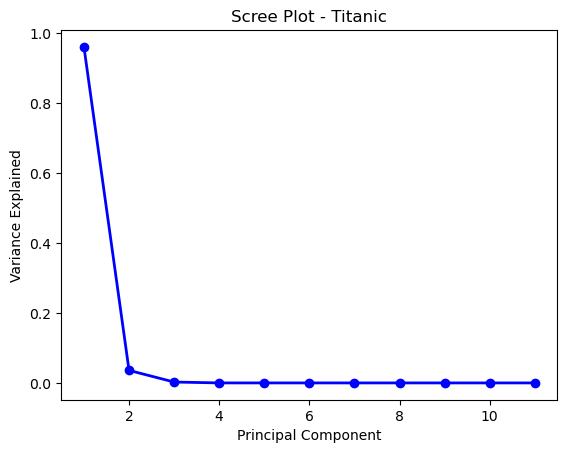

In [90]:
# Compute the explained variance ratio for a range of n_components
import matplotlib.pyplot as plt

pca = PCA(n_components=11, iterated_power=2000)
X_pca = pca.fit_transform(X)

PC_values = np.arange(pca.n_components_) + 1
plt.plot(PC_values, pca.explained_variance_ratio_, 'o-', linewidth=2, color='blue')
plt.title('Scree Plot - Titanic')
plt.xlabel('Principal Component')
plt.ylabel('Variance Explained')
plt.show()

Text(0.5, 1.0, 'Scree Plot - Titanic Dataset')

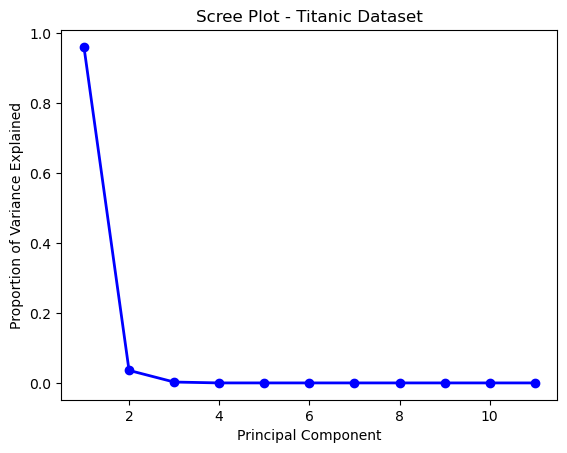

In [91]:
plt.plot(range(1, len(pca.explained_variance_ratio_)+1), pca.explained_variance_ratio_, 'bo-', linewidth=2)
plt.xlabel('Principal Component')
plt.ylabel('Proportion of Variance Explained')
plt.title('Scree Plot - Titanic Dataset')

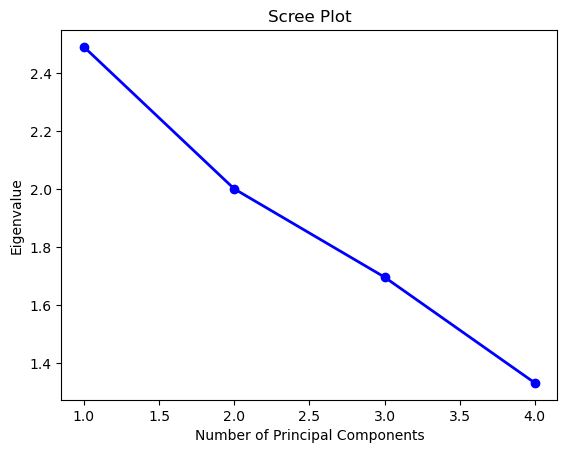

In [88]:
eigenvalues = pca.explained_variance_

# Plot the scree plot
plt.plot(range(1, len(eigenvalues) + 1), eigenvalues, 'bo-', linewidth=2)
plt.xlabel('Number of Principal Components')
plt.ylabel('Eigenvalue')
plt.title('Scree Plot')
plt.show()

ICA

d:\miniconda3\envs\ai_env\lib\site-packages\sklearn\decomposition\_fastica.py:119: ConvergenceWarning: FastICA did not converge. Consider increasing tolerance or the maximum number of iterations.
  ConvergenceWarning,
d:\miniconda3\envs\ai_env\lib\site-packages\sklearn\decomposition\_fastica.py:119: ConvergenceWarning: FastICA did not converge. Consider increasing tolerance or the maximum number of iterations.
  ConvergenceWarning,


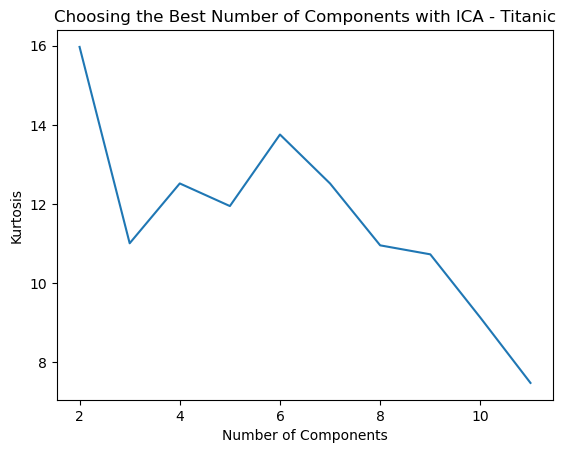

In [96]:
import numpy as np
import pandas as pd
from sklearn.decomposition import FastICA
from scipy.stats import kurtosis

X, y = get_data()

# Create a FastICA object
ica = FastICA(random_state=0)

# Choose a range of n_components to try
n_components_range = range(2, X.shape[1]+1)

# Calculate kurtosis for each value of n_components
kurtosis_scores = []
for n_components in n_components_range:
    ica.set_params(n_components=n_components)
    X_ica = ica.fit_transform(X)
    kurtosis_scores.append(np.mean(kurtosis(X_ica)))

# Plot the kurtosis scores vs n_components
import matplotlib.pyplot as plt
plt.plot(n_components_range, kurtosis_scores)
plt.xlabel('Number of Components')
plt.ylabel('Kurtosis')
plt.title('Choosing the Best Number of Components with ICA - Titanic')
plt.show()

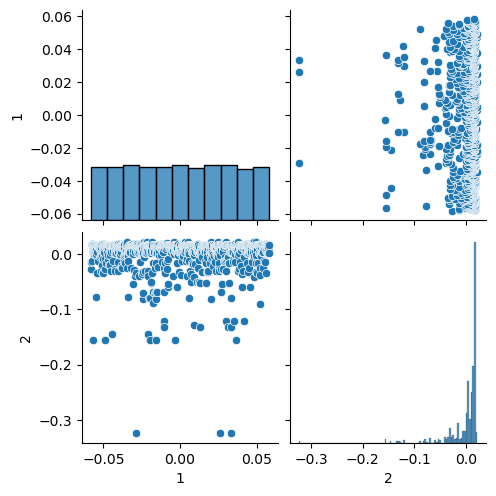

In [100]:
import numpy as np
import pandas as pd
from sklearn.decomposition import FastICA
import matplotlib.pyplot as plt

# Load the wine dataset
X, y = get_data()

# Create a FastICA object with the best n_components value
ica = FastICA(n_components=2, random_state=0)
X_ica = ica.fit_transform(X)

# Visualize the independ
df = pd.DataFrame(X_ica, columns=['1','2'])
sns.pairplot(df)

Randomized Projections

In [12]:
from sklearn.datasets import load_wine
from sklearn import random_projection
from sklearn.random_projection import GaussianRandomProjection
from sklearn.preprocessing import StandardScaler

X,y = get_data()

# Apply Randomized Projections with n_components = 5
rp = GaussianRandomProjection(n_components=5)
X_rp = rp.fit_transform(X)

# Print the shape of the transformed dataset
print("Original shape: ", X.shape)
print("Transformed shape: ", X_rp.shape)

Original shape:  (891, 10)
Transformed shape:  (891, 5)


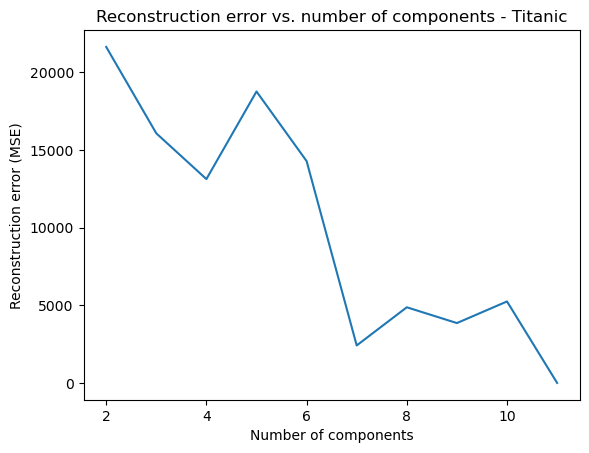

In [150]:
from sklearn.random_projection import GaussianRandomProjection
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import StandardScaler

X,y = get_data()
n_components_range = range(2, 12)
reconstruction_errors = []

for n in n_components_range:
    grp = GaussianRandomProjection(n_components=n)
    X_proj = grp.fit_transform(X)
    P = grp.components_
    X_recon = np.linalg.pinv(P).dot(X_proj.T).T
    mse = mean_squared_error(X, X_recon)
    reconstruction_errors.append(mse)

plt.plot(n_components_range, reconstruction_errors)
plt.xlabel('Number of components')
plt.ylabel('Reconstruction error (MSE)')
plt.title('Reconstruction error vs. number of components - Titanic')
plt.show()

Text(0.5, 1.0, 'Transformed Data - Titanic')

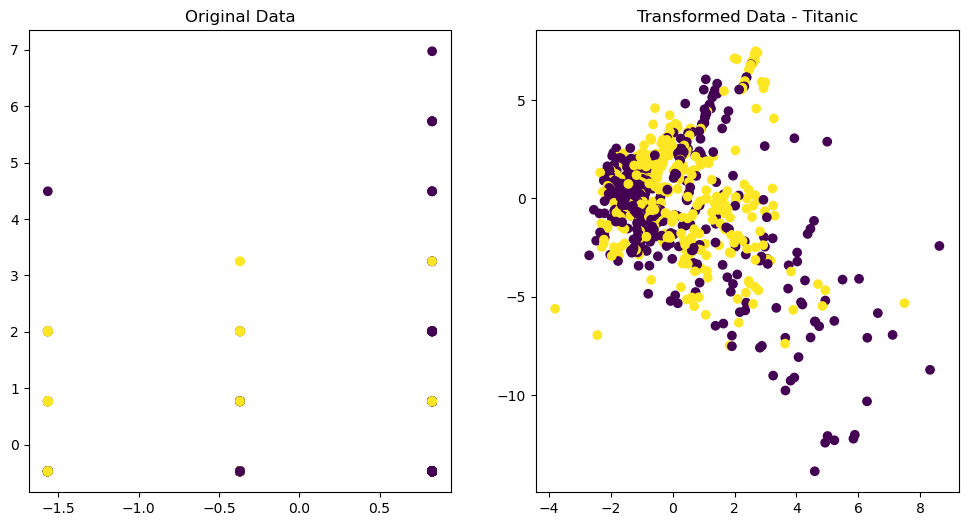

In [149]:
n_components = 2
grp = GaussianRandomProjection(n_components=n_components, random_state=42)
X,y = get_data()
X= X.values
scaler = StandardScaler()
X_std = scaler.fit_transform(X)
X_transformed = grp.fit_transform(X_std)
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(12,6))

# scatter plot of the original dataset
scatter1 = ax1.scatter(X_std[:, 0], X_std[:, 3], c=y.values)
ax1.set_title('Original Data')
# # scatter plot of the transformed dataset
scatter2 = ax2.scatter(X_transformed[:, 0], X_transformed[:, 1], c=y.values)
ax2.set_title('Transformed Data - Titanic')

# # addasses") legend
# handles, labels = scatter1.legend_elements()
# ax1.legend(handles, wine.target_names, loc="upper right", title="Classes")
# handles, labels = scatter2.legend_elements()
# ax2.legend(handles, wine.target_names, loc="upper right", title="Cl

RFECV

d:\miniconda3\envs\ai_env\lib\site-packages\sklearn\utils\deprecation.py:103: FutureWarning: The `grid_scores_` attribute is deprecated in version 1.0 in favor of `cv_results_` and will be removed in version 1.2.
  warnings.warn(msg, category=FutureWarning)
d:\miniconda3\envs\ai_env\lib\site-packages\sklearn\utils\deprecation.py:103: FutureWarning: The `grid_scores_` attribute is deprecated in version 1.0 in favor of `cv_results_` and will be removed in version 1.2.
  warnings.warn(msg, category=FutureWarning)
d:\miniconda3\envs\ai_env\lib\site-packages\sklearn\utils\deprecation.py:103: FutureWarning: The `grid_scores_` attribute is deprecated in version 1.0 in favor of `cv_results_` and will be removed in version 1.2.
  warnings.warn(msg, category=FutureWarning)
d:\miniconda3\envs\ai_env\lib\site-packages\sklearn\utils\deprecation.py:103: FutureWarning: The `grid_scores_` attribute is deprecated in version 1.0 in favor of `cv_results_` and will be removed in version 1.2.
  warnings.wa

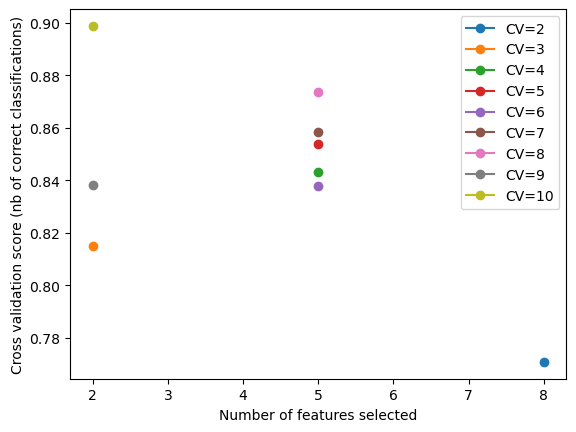

Optimal number of features (CV=2): 8
Optimal number of features (CV=3): 2
Optimal number of features (CV=4): 5
Optimal number of features (CV=5): 5
Optimal number of features (CV=6): 5
Optimal number of features (CV=7): 5
Optimal number of features (CV=8): 5
Optimal number of features (CV=9): 2
Optimal number of features (CV=10): 2


In [72]:
from sklearn.datasets import load_wine
from sklearn.feature_selection import RFECV
from sklearn.tree import DecisionTreeClassifier
import matplotlib.pyplot as plt
import numpy as np

X,y = get_data()

# Define a range of cv values to test
cv_range = np.arange(2, 11)

# Create a decision tree classifier
clf = DecisionTreeClassifier()

# Store the number of features selected for each cv value
n_features_list = []

# Store the cross-validation scores for each cv value
cv_scores_list = []

# Loop over the range of cv values
for cv in cv_range:
    # Create an RFECV object with the current cv value
    rfecv = RFECV(estimator=clf, step=1, cv=cv)

    # Fit the RFECV object to the dataset
    rfecv.fit(X, y)

    # Store the number of features selected and the cv score
    n_features_list.append(rfecv.n_features_)
    cv_scores_list.append(rfecv.grid_scores_.max())

# Plot the number of features vs. cross-validation scores for each cv value
plt.figure()
plt.xlabel("Number of features selected")
plt.ylabel("Cross validation score (nb of correct classifications)")
for i in range(len(cv_range)):
    plt.plot(n_features_list[i], cv_scores_list[i], 'o-', label="CV=%d" % cv_range[i])
plt.legend()
plt.show()

# Print the optimal number of features for each cv value
for i in range(len(cv_range)):
    print("Optimal number of features (CV=%d): %d" % (cv_range[i], n_features_list[i]))

d:\miniconda3\envs\ai_env\lib\site-packages\sklearn\utils\deprecation.py:103: FutureWarning: The `grid_scores_` attribute is deprecated in version 1.0 in favor of `cv_results_` and will be removed in version 1.2.
  warnings.warn(msg, category=FutureWarning)


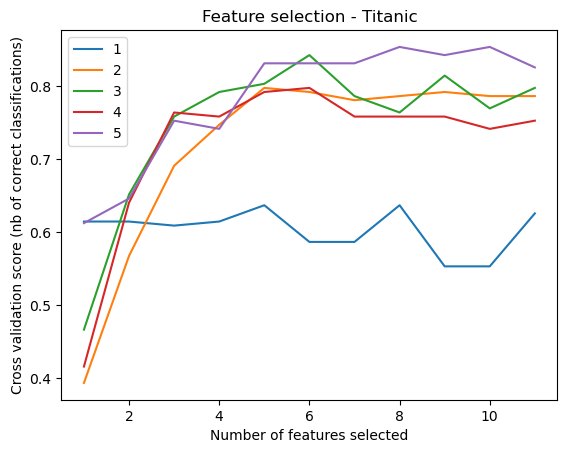

Optimal number of features: 5


In [164]:
from sklearn.datasets import load_wine
from sklearn.feature_selection import RFECV
from sklearn.tree import DecisionTreeClassifier
import matplotlib.pyplot as plt

X,y = get_data()

# Create a decision tree classifier
clf = DecisionTreeClassifier()

# Create an RFECV object
rfecv = RFECV(estimator=clf, step=1, cv=5)

# Fit the RFECV object to the dataset
rfecv.fit(X, y)

# Plot the number of features vs. cross-validation scores
plt.figure()
plt.xlabel("Number of features selected")
plt.ylabel("Cross validation score (nb of correct classifications)")
plt.plot(range(1, len(rfecv.grid_scores_) + 1), rfecv.grid_scores_)
plt.legend(['1','2','3','4','5'])
plt.title('Feature selection - Titanic')
plt.show()

# Print the optimal number of features
print("Optimal number of features: %d" % rfecv.n_features_)

[2 0 2 0 2 2 0 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 1 2 2 2 0 2 2 0 0 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 0 2 0 2 2 2 2 2 2 0 0 2 2 2 2 2 2 2 2 2 0 2
 0 2 2 2 2 2 2 2 2 2 2 2 2 2 1 2 2 2 0 2 2 2 2 0 2 2 2 2 0 2 2 2 2 2 2 2 0
 2 2 2 2 2 2 2 1 2 0 2 2 2 0 2 2 2 2 2 2 2 2 2 2 2 2 0 2 0 2 2 2 2 2 2 2 2
 2 2 2 0 2 2 2 0 2 2 2 0 2 2 2 2 2 2 0 2 2 0 2 2 2 2 2 2 2 2 2 2 0 2 2 2 2
 0 2 2 2 2 2 2 2 2 2 0 2 2 2 2 2 0 2 2 2 2 2 2 2 2 2 2 2 2 2 0 2 2 0 2 2 2
 2 2 0 2 2 2 2 2 0 2 2 2 2 2 2 2 2 2 2 2 2 2 2 0 2 2 0 2 2 2 2 2 2 2 0 0 1
 2 2 2 0 2 2 2 2 2 0 0 2 2 2 2 2 0 2 2 2 2 2 2 2 2 2 2 2 2 2 2 0 0 2 2 2 2
 2 0 2 1 2 2 2 2 2 0 0 0 2 0 0 1 2 2 2 2 2 2 0 0 2 2 2 2 0 0 2 2 2 0 2 2 0
 2 0 2 0 0 2 2 2 1 2 2 2 2 2 2 2 2 2 2 2 2 2 2 0 2 2 2 2 2 2 2 2 2 0 2 2 0
 0 2 2 0 2 0 2 1 2 2 1 2 2 0 2 0 2 2 2 2 0 2 2 0 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 0 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 0 0 2 2 1 2 2 2 2 2
 2 0 2 2 2 2 2 2 2 0 2 2 2 0 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 0 2 2 2 2 2
 2 2 2 0 2 0 2 2 2 2 2 2 

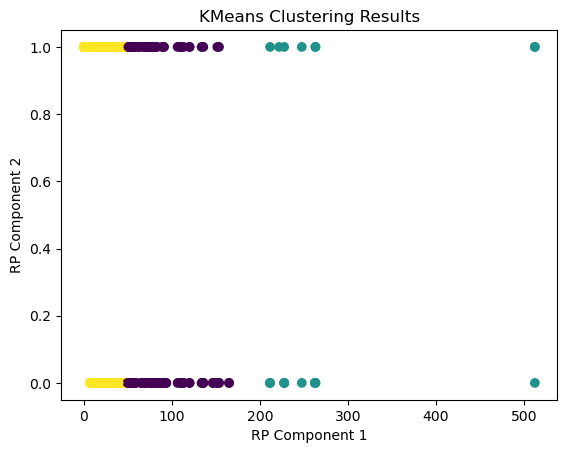

In [22]:
from sklearn.datasets import load_wine
from sklearn.feature_selection import RFECV
from sklearn.tree import DecisionTreeClassifier
from sklearn.cluster import KMeans

X,y = get_data()
X= X.values

# Create a decision tree classifier
clf = DecisionTreeClassifier()

# Create an RFECV object
rfecv = RFECV(estimator=clf, step=1, cv=5)

# Fit the RFECV object to the dataset
rfecv.fit(X, y)

# Select the optimal number of features
X_reduced = X[:, rfecv.support_]

# Apply KMeans clustering to the reduced dataset
kmeans = KMeans(n_clusters=3, random_state=0)
labels = kmeans.fit_predict(X_reduced)

# Print the cluster labels
print(kmeans.labels_)


plt.scatter(X_reduced[:, 0], X_reduced[:, 1], c=labels)
plt.xlabel('RP Component 1')
plt.ylabel('RP Component 2')
plt.title('KMeans Clustering Results')
plt.show()

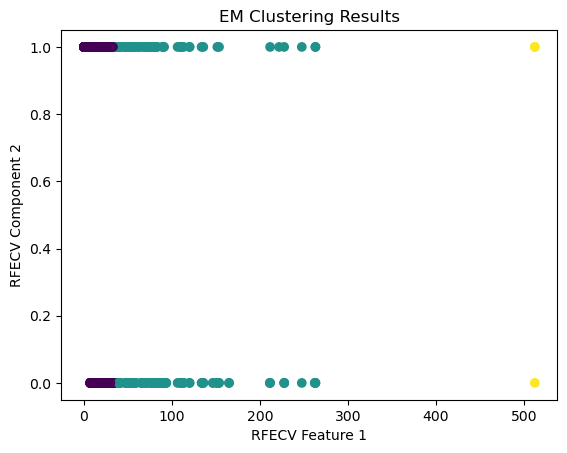

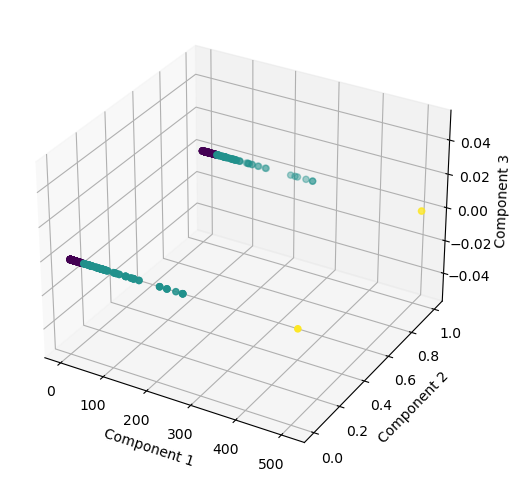

In [27]:
from sklearn.mixture import GaussianMixture
gmm_rfecv = GaussianMixture(n_components=3, random_state=2742)
gmm_rfecv.fit(X_reduced)

clusters = gmm_rfecv.predict(X_reduced)

# silhouette_avg = silhouette_score(X_reduced, clusters)

# Visualize the clustering results
plt.scatter(X_reduced[:, 0], X_reduced[:, 1], c=clusters)
plt.xlabel('RFECV Feature 1')
plt.ylabel('RFECV Component 2')
plt.title('EM Clustering Results')
plt.show()

#Plot the clusters in the projected space
fig = plt.figure(figsize=(8, 6))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(X_reduced[:, 0], X_reduced[:, 1], c=clusters, cmap='viridis')
ax.set_xlabel('Component 1')
ax.set_ylabel('Component 2')
ax.set_zlabel('Component 3')
plt.show()

section 3 - applying the algos to knn and gmm

In [82]:
def get_best_cluster_count_kmeans(x, title):
    distortions = []
    K = range(1, 11)
    for k in K:
        kmeans = KMeans(n_clusters=k, random_state=0)
        kmeans.fit(x)
        distortions.append(kmeans.inertia_)

    # Plot the elbow curve
    plt.plot(K, distortions, 'bx-')
    plt.xlabel('k')
    plt.ylabel('Distortion')
    plt.title('Elbow Method - Titanic - ' + title)
    plt.show()

def get_best_component_count_em(x, title):
    n_components_range = range(1, 11)

    # Fit GMM for each value of n_components and compute BIC
    bics = []
    for n_components in n_components_range:
        gmm = GaussianMixture(n_components=n_components, random_state=42)
        gmm.fit(x)
        bics.append(gmm.bic(x))


    # Plot the elbow curve
    plt.plot(n_components_range, bics, 'bx-')
    plt.xlabel('k')
    plt.ylabel('BICS')
    plt.title('GMM - Titanic - ' + title)
    plt.show()

    # Find the best value of n_components
    best_n_components = n_components_range[np.argmin(bics)]
    print(f"Best n_components: {best_n_components}")


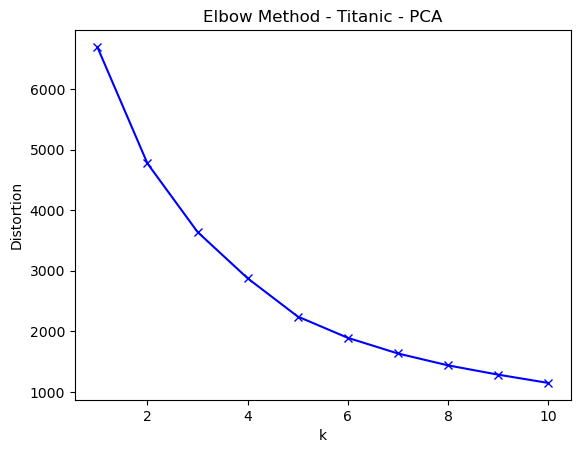

In [79]:
#knn pca

get_best_cluster_count_kmeans(X_pca, 'PCA')

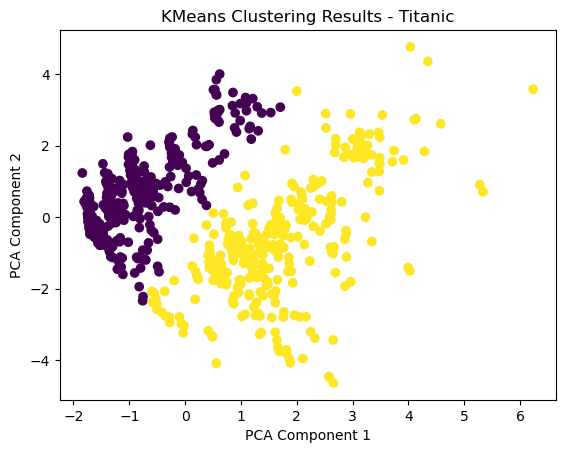

In [165]:
#optimal k value is 2
kmeans = KMeans(n_clusters=2, random_state=1714)
labels = kmeans.fit_predict(X_pca)

# Visualize the clustering results
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=labels)
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.title('KMeans Clustering Results - Titanic')
plt.show()

In [166]:
from sklearn.metrics import silhouette_score, v_measure_score

labels = kmeans.labels_
s_score = silhouette_score(X_pca, labels)
print("Silhouette score:",s_score)
# Calculate the V-score
v_score = v_measure_score(wine.target, labels)

# Print the V-score
print("V-score:", v_score)


Silhouette score: 0.49915400954426536


NameError: name 'wine' is not defined

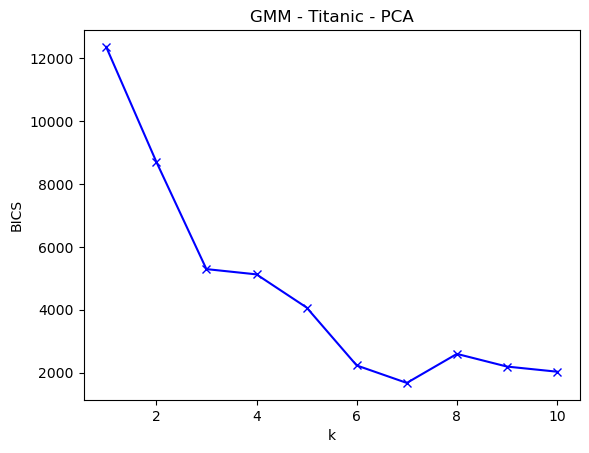

Best n_components: 7


In [83]:
#gmm PCA
get_best_component_count_em(X_pca , 'PCA')

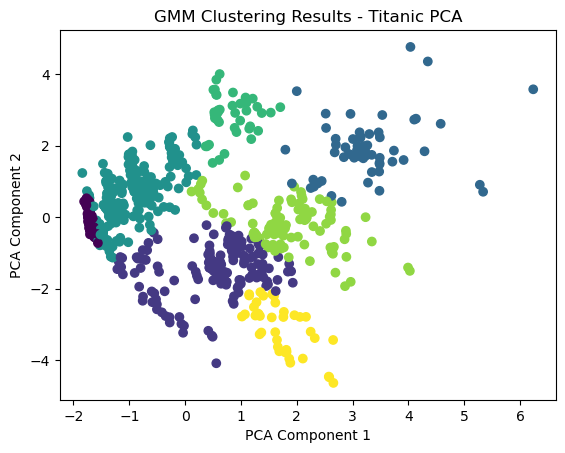

In [178]:
gmm_pca = GaussianMixture(n_components=7, random_state=2742)
gmm_pca.fit(X_pca)

clusters_gmm = gmm_pca.predict(X_pca)

# silhouette_avg = silhouette_score(X_pca, clusters_gmm)

# Visualize the clustering results
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=clusters_gmm)
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.title('GMM Clustering Results - Titanic PCA')
plt.show()

# print(silhouette_avg)

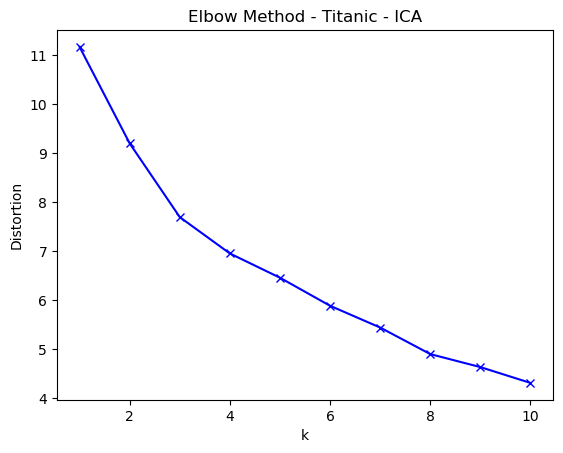

In [97]:
#ica kmeans
get_best_cluster_count_kmeans(X_ica, 'ICA')

In [179]:
from sklearn.metrics import silhouette_score, v_measure_score

labels = kmeans.labels_
s_score = silhouette_score(X_pca, clusters_gmm)
print("Silhouette score:",s_score)

Silhouette score: 0.3339197993019505


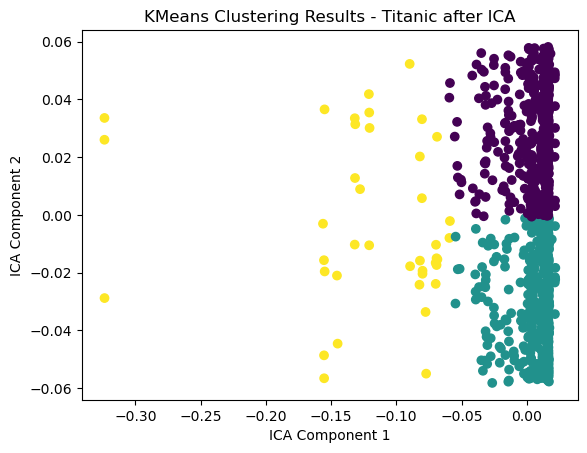

In [167]:
#optimal k-value = 3
kmeans = KMeans(n_clusters=3, random_state=42)
labels = kmeans.fit_predict(X_ica)

# Visualize the clustering results
plt.scatter(X_ica[:, 1], X_ica[:, 0], c=labels)
plt.xlabel('ICA Component 1')
plt.ylabel('ICA Component 2')
plt.title('KMeans Clustering Results - Titanic after ICA')
plt.show()

In [168]:
from sklearn.metrics import silhouette_score, v_measure_score

labels = kmeans.labels_
s_score = silhouette_score(X_ica, labels)
print("Silhouette score:",s_score)

Silhouette score: 0.5120662938696824


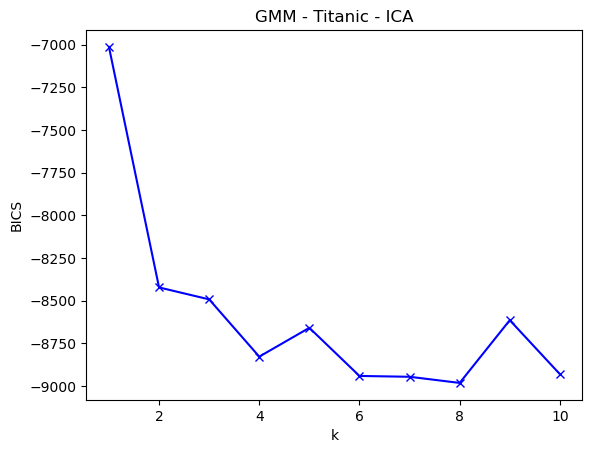

Best n_components: 8


In [104]:
#gmm ICA
get_best_component_count_em(X_ica, 'ICA')

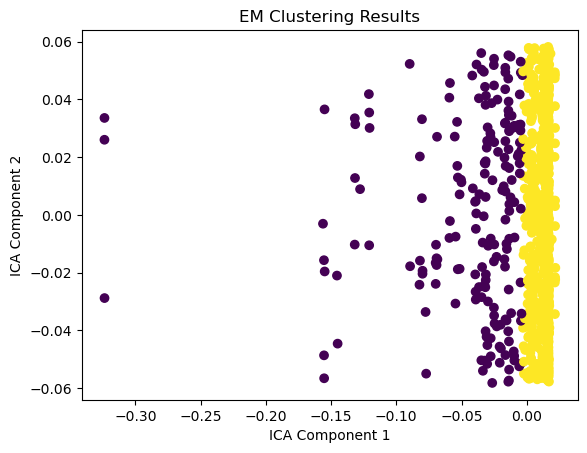

In [109]:
#gmm ICA optimal n_components = 8

gmm_ICA = GaussianMixture(n_components=2, random_state=2742)
gmm_ICA.fit(X_ica)

clusters = gmm_ICA.predict(X_ica)

# Visualize the clustering results
plt.scatter(X_ica[:, 1], X_ica[:, 0], c=clusters)
plt.xlabel('ICA Component 1')
plt.ylabel('ICA Component 2')
plt.title('EM Clustering Results')
plt.show()

In [169]:
from sklearn.metrics import silhouette_score, v_measure_score

s_score = silhouette_score(X_ica, clusters)
print("Silhouette score:",s_score)

Silhouette score: -0.004487575344138554


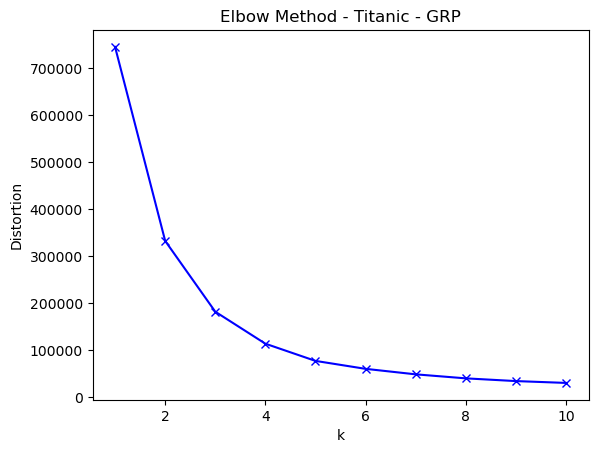

In [151]:
#kmeans RP
get_best_cluster_count_kmeans(X_rp, 'GRP')

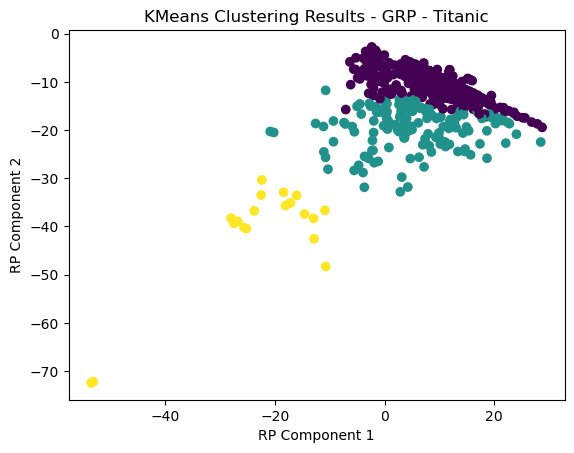

In [170]:
kmeans = KMeans(n_clusters=3, random_state=42)
labels = kmeans.fit_predict(X_rp)

# Visualize the clustering results
plt.scatter(X_rp[:, 0], X_rp[:, 1], c=labels)
plt.xlabel('RP Component 1')
plt.ylabel('RP Component 2')
plt.title('KMeans Clustering Results - GRP - Titanic')
plt.show()

In [171]:

from sklearn.metrics import silhouette_score, v_measure_score

s_score = silhouette_score(X_rp, labels)
print("Silhouette score:",s_score)

Silhouette score: 0.6401703333999511


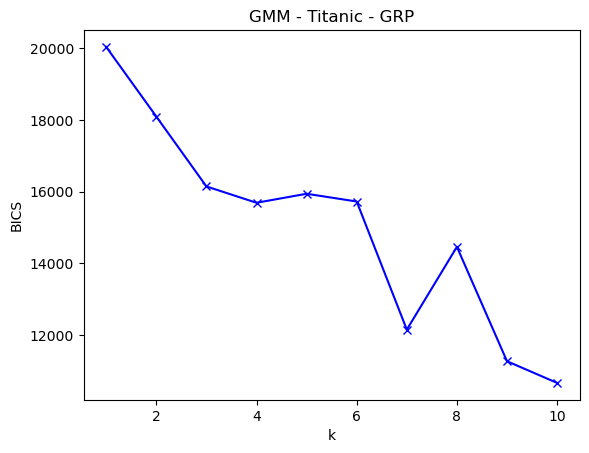

Best n_components: 10


In [154]:
#gmm rp
get_best_component_count_em(X_rp, 'GRP')

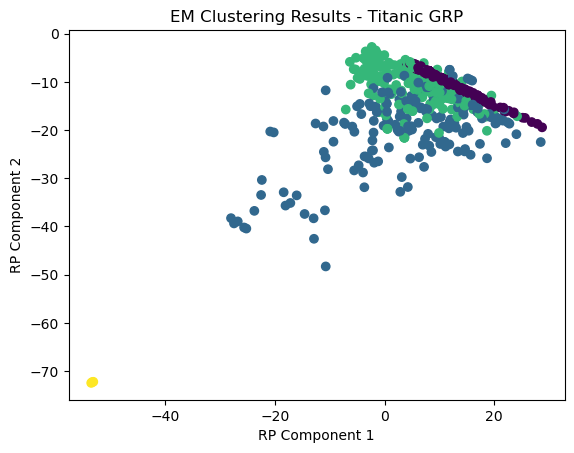

In [172]:
#best n_components = 10
gmm_rp = GaussianMixture(n_components=4, random_state=2742)
gmm_rp.fit(X_rp)

clusters = gmm_rp.predict(X_rp)

# silhouette_avg = silhouette_score(X_rp, clusters)

# Visualize the clustering results
plt.scatter(X_rp[:, 0], X_rp[:, 1], c=clusters)
plt.xlabel('RP Component 1')
plt.ylabel('RP Component 2')
plt.title('EM Clustering Results - Titanic GRP')
plt.show()

In [173]:

from sklearn.metrics import silhouette_score, v_measure_score

s_score = silhouette_score(X_rp, clusters)
print("Silhouette score:",s_score)

Silhouette score: 0.1349660238564403


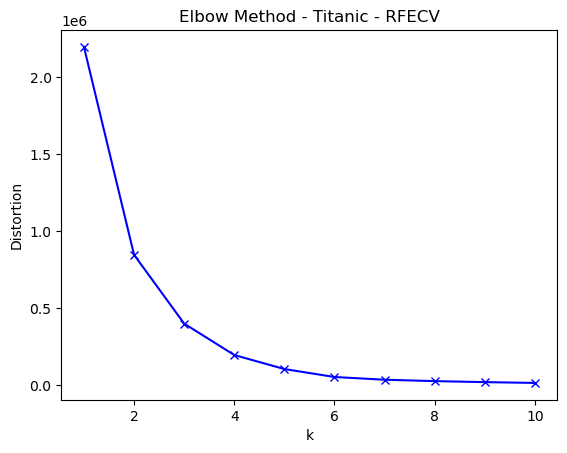

In [163]:
#kmeans rfecv
get_best_cluster_count_kmeans(X_reduced, 'RFECV')

[2 0 2 0 2 2 0 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 1 2 2 2 0 2 2 0 0 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 0 2 0 2 2 2 2 2 2 0 0 2 2 2 2 2 2 2 2 2 0 2
 0 2 2 2 2 2 2 2 2 2 2 2 2 2 1 2 2 2 0 2 2 2 2 0 2 2 2 2 0 2 2 2 2 2 2 2 0
 2 2 2 2 2 2 2 1 2 0 2 2 2 0 2 2 2 2 2 2 2 2 2 2 2 2 0 2 0 2 2 2 2 2 2 2 2
 2 2 2 0 2 2 2 0 2 2 2 0 2 2 2 2 2 2 0 2 2 0 2 2 2 2 2 2 2 2 2 2 0 2 2 2 2
 0 2 2 2 2 2 2 2 2 2 0 2 2 2 2 2 0 2 2 2 2 2 2 2 2 2 2 2 2 2 0 2 2 0 2 2 2
 2 2 0 2 2 2 2 2 0 2 2 2 2 2 2 2 2 2 2 2 2 2 2 0 2 2 0 2 2 2 2 2 2 2 0 0 1
 2 2 2 0 2 2 2 2 2 0 0 2 2 2 2 2 0 2 2 2 2 2 2 2 2 2 2 2 2 2 2 0 0 2 2 2 2
 2 0 2 1 2 2 2 2 2 0 0 0 2 0 0 1 2 2 2 2 2 2 0 0 2 2 2 2 0 0 2 2 2 0 2 2 0
 2 0 2 0 0 2 2 2 1 2 2 2 2 2 2 2 2 2 2 2 2 2 2 0 2 2 2 2 2 2 2 2 2 0 2 2 0
 0 2 2 0 2 0 2 1 2 2 1 2 2 0 2 0 2 2 2 2 0 2 2 0 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 0 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 0 0 2 2 1 2 2 2 2 2
 2 0 2 2 2 2 2 2 2 0 2 2 2 0 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 0 2 2 2 2 2
 2 2 2 0 2 0 2 2 2 2 2 2 

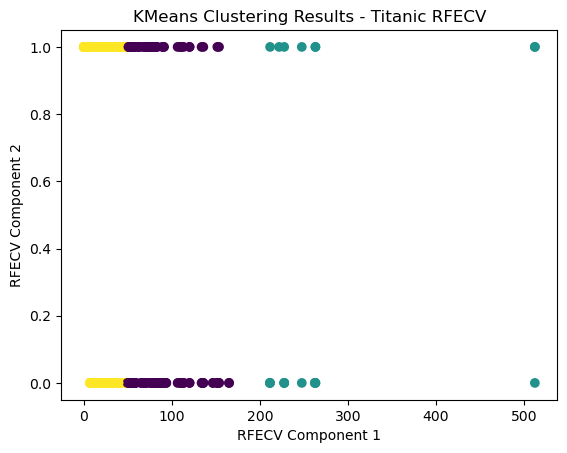

In [174]:
#best n_clusters = 2

kmeans = KMeans(n_clusters=3, random_state=0)
labels = kmeans.fit_predict(X_reduced)

# Print the cluster labels
print(kmeans.labels_)


plt.scatter(X_reduced[:, 0], X_reduced[:, 1], c=labels)
plt.xlabel('RFECV Component 1')
plt.ylabel('RFECV Component 2')
plt.title('KMeans Clustering Results - Titanic RFECV')
plt.show()

In [175]:

from sklearn.metrics import silhouette_score, v_measure_score

s_score = silhouette_score(X_reduced, labels)
print("Silhouette score:",s_score)

Silhouette score: 0.7659111416739458


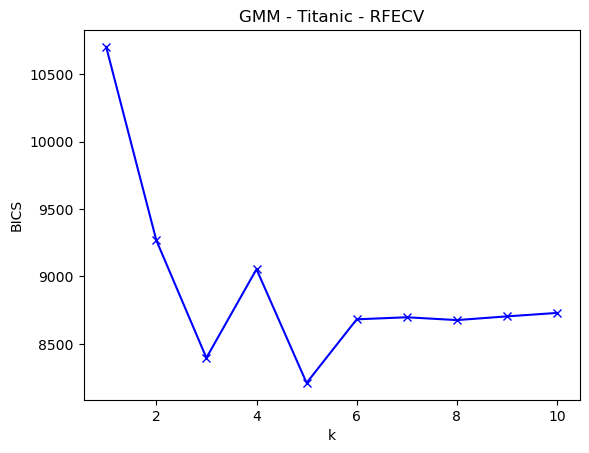

Best n_components: 5


In [161]:
#gmm rfecv
get_best_component_count_em(X_reduced, 'RFECV')

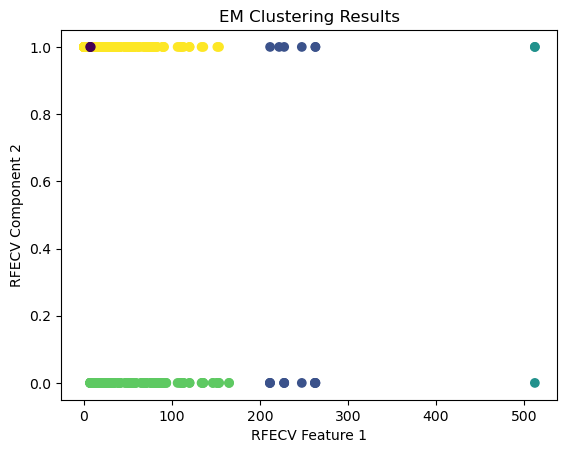

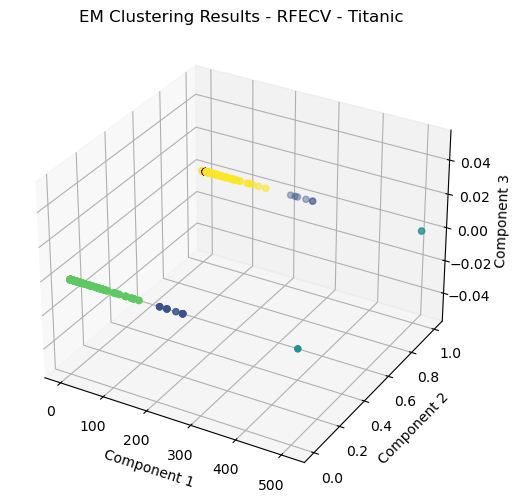

In [176]:
#BEST n_components = 5
gmm_rp = GaussianMixture(n_components=5, random_state=2742)
gmm_rp.fit(X_reduced)

clusters = gmm_rp.predict(X_reduced)

# silhouette_avg = silhouette_score(X_reduced, clusters)

# Visualize the clustering results
plt.scatter(X_reduced[:, 0], X_reduced[:, 1], c=clusters)
plt.xlabel('RFECV Feature 1')
plt.ylabel('RFECV Component 2')
plt.title('EM Clustering Results')
plt.show()

#Plot the clusters in the projected space
fig = plt.figure(figsize=(8, 6))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(X_reduced[:, 0], X_reduced[:, 1], c=clusters, cmap='viridis')
ax.set_xlabel('Component 1')
ax.set_ylabel('Component 2')
ax.set_zlabel('Component 3')
plt.title('EM Clustering Results - RFECV - Titanic')
plt.show()

In [177]:

from sklearn.metrics import silhouette_score, v_measure_score

s_score = silhouette_score(X_reduced, clusters)
print("Silhouette score:",s_score)

Silhouette score: 0.015010499156192703
